In [45]:
import numpy as np
from scipy import optimize

In [46]:
class NeuralNetwork:

    def __init__(self):
        self.inputLayer = 2
        self.outputLayer = 1
        self.hiddenLayer = 3

        # weights
        self.W1 = np.random.randn(self.inputLayer,
                                self.hiddenLayer)
        self.W2 = np.random.randn(self.hiddenLayer,
                                 self.outputLayer)
    
    def forward(self,X):
        # propogate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    # Activation function
    def sigmoid(self,z):
        return 1/(1 + np.exp(-z))
    
    def sigmoidPrime(self,z):
        # derivative of sigmoid function
        return np.exp(-z)/((1 + np.exp(-z))**2)
    
    def costFunction(self,X,y):
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self,X,y):
        # compute derivative with respect to W1 and W2
        self.yHat = self.forward(X)

        delta3 = np.multiply(-(y-self.yHat),self.sigmoid(self.z3))
        dJdW2 = np.dot(self.a2.T,delta3)

        delta2 = np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T,delta2)

        return dJdW1,dJdW2
    
    # Helper functions for interacting with other methods

    def getParams(self):
        # Get W1 and W2 rolled into vector:
        params = np.concatenate((self.W1.ravel(),self.W2.ravel()))
        return params
    
    def setParams(self,params):
        W1_start = 0
        W1_end = self.hiddenLayer*self.inputLayer
        self.W1 = np.reshape(params[W1_start:W1_end],
                             (self.inputLayer,self.hiddenLayer))
        
        W2_end = W1_end + self.hiddenLayer*self.outputLayer
        self.W2 = np.reshape(params[W1_end:W2_end],
                             (self.hiddenLayer,self.outputLayer))
        
    def computeGradients(self,X,y):
        dJdW1,dJdW2 = self.costFunctionPrime(X,y)
        return np.concatenate((dJdW1.ravel(),dJdW2.ravel()))
    
    def computeNumericalGradient(self,X,y):
        paramsInitial = self.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            # set perturbation vector
            perturb[p] = e
            self.setParams(paramsInitial + perturb)
            loss2 = self.costFunction(X,y)

            self.setParams(paramsInitial - perturb)
            loss1 = self.costFunction(X,y)

            # compute numerical Gradient:
            numgrad[p] = (loss2 - loss1)/(2*e)

            # return the value we changed back to zero:
            perturb[p] = 0
        
        self.setParams(paramsInitial)

        return numgrad
    

class Trainer(object):
    def __init__(self,N):
        self.N = N

    def costFunctionWrapper(self,params,X,y):
        self.N.setParams(params)
        cost = self.N.costFunction(X,y)
        grad = self.N.computeGradients(X,y)
        return cost,grad
    
    def callbackF(self,params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X,self.y))

    def train(self,X,y):
        self.X = X
        self.y = y

        self.J = []

        params0 = self.N.getParams()

        options = {'maxiter':200,'disp':True}
        _res = optimize.minimize(self.costFunctionWrapper,params0,
                                 jac = True,method='BFGS',args = (X,y),
                                 options= options,callback=self.callbackF)
        
        self.N.setParams(_res.x)
        self.optimizationResults = _res



In [47]:
X = np.array([[3,5],[5,1],[10,2]])
y = np.array([[0.75],[0.82],[0.93]])


In [48]:
NN = NeuralNetwork()
yHat = NN.forward(X)

In [49]:
yHat    # Bad prediction

array([[0.79325833],
       [0.72333969],
       [0.70027618]])

In [50]:
T = Trainer(NN)

In [51]:
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 88
         Function evaluations: 159
         Gradient evaluations: 159


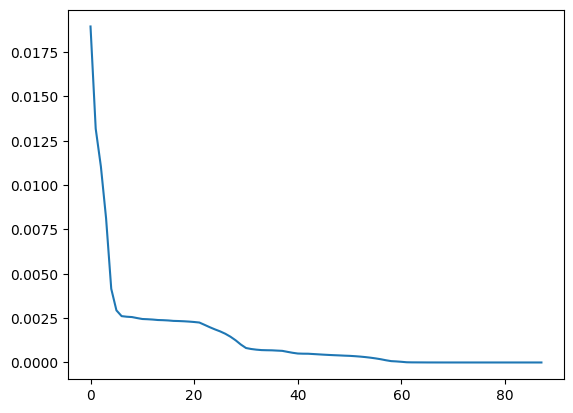

In [53]:
# import matplotlib.pyplot as plt
plt.plot(T.J)
plt.show()

In [54]:
NN.costFunctionPrime(X,y)

(array([[-4.53715049e-06,  1.57399106e-07,  8.07411855e-06],
        [-1.69363892e-06, -2.70878704e-07,  4.01378932e-06]]),
 array([[-2.46755915e-07],
        [-1.29428718e-08],
        [-4.32415156e-08]]))

In [55]:
NN.forward(X)

array([[0.74999884],
       [0.82000453],
       [0.92999746]])

In [56]:
y

array([[0.75],
       [0.82],
       [0.93]])